In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')
%matplotlib inline

In [41]:
import yfinance as yf
import datetime as dt

stock = "COMB-N0000.CM"
start = dt.datetime(2000, 1, 1)
end = dt.datetime(2025, 9, 22)

df=yf.download(stock, start, end)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_13700\2700427336.py:8: FutureWarning:

YF.download() has changed argument auto_adjust default to True

[*********************100%***********************]  1 of 1 completed


In [42]:
df.head()

Price,Close,High,Low,Open,Volume
Ticker,COMB-N0000.CM,COMB-N0000.CM,COMB-N0000.CM,COMB-N0000.CM,COMB-N0000.CM
Date,,,,,
2007-12-31,21.692528,22.135231,21.397390,21.544958,2899180
2008-01-02,21.397392,22.098341,21.397392,22.098341,3976
2008-01-03,21.434284,21.434284,21.397392,21.397392,17896
2008-01-04,21.508068,21.544960,21.176041,21.323608,489162
2008-01-07,21.397392,21.434284,21.397392,21.434284,9146


In [43]:
df.isnull().sum()

Price   Ticker       
Close   COMB-N0000.CM    0
High    COMB-N0000.CM    0
Low     COMB-N0000.CM    0
Open    COMB-N0000.CM    0
Volume  COMB-N0000.CM    0
dtype: int64

In [44]:
df.describe()

Price,Close,High,Low,Open,Volume
Ticker,COMB-N0000.CM,COMB-N0000.CM,COMB-N0000.CM,COMB-N0000.CM,COMB-N0000.CM
count,4388.000000,4388.000000,4388.000000,4388.000000,4.388000e+03
mean,66.205503,66.815210,65.717466,66.327022,4.927717e+05
std,29.158257,29.362100,28.923009,29.124177,2.055464e+06
min,9.813288,9.887072,9.739503,9.813288,0.000000e+00
25%,49.733887,50.230365,49.167983,49.814499,2.183225e+04
50%,63.765812,64.420753,63.413409,64.095270,1.316755e+05
75%,83.246593,83.939811,82.742173,83.313992,4.378465e+05
max,197.750000,199.250000,196.250000,198.000000,9.412548e+07


In [45]:
df=df.reset_index()


In [46]:
df.columns

MultiIndex([(  'Date',              ''),
            ( 'Close', 'COMB-N0000.CM'),
            (  'High', 'COMB-N0000.CM'),
            (   'Low', 'COMB-N0000.CM'),
            (  'Open', 'COMB-N0000.CM'),
            ('Volume', 'COMB-N0000.CM')],
           names=['Price', 'Ticker'])

In [47]:
df.to_csv("stock_prices.csv")

data = pd.read_csv("stock_prices.csv")
data.head()

,Price,Date,Close,High,Low,Open,Volume
0,Ticker,NaN,COMB-N0000.CM,COMB-N0000.CM,COMB-N0000.CM,COMB-N0000.CM,COMB-N0000.CM
1,0,2007-12-31,21.692527770996094,22.135231048736163,21.397390013778292,21.54495777302498,2899180
2,1,2008-01-02,21.39739227294922,22.098341442102754,21.39739227294922,22.098341442102754,3976
3,2,2008-01-03,21.434284210205078,21.434284210205078,21.3973922665094,21.3973922665094,17896
4,3,2008-01-04,21.508068084716797,21.544960028390385,21.176040591654505,21.323608366348857,489162


In [48]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Candlestick(
    x=data['Date'],
    open=data['Open'],
    high=data['High'],
    low=data['Low'],
    close=data['Close']
)])

fig.update_layout(xaxis_rangeslider_visible=False)
fig.show(renderer="browser")

In [49]:
df = df.drop(['Date'], axis=1)
df.head(5)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_13700\2982711061.py:1: PerformanceWarning:

dropping on a non-lexsorted multi-index without a level parameter may impact performance.



Price,Close,High,Low,Open,Volume
Ticker,COMB-N0000.CM,COMB-N0000.CM,COMB-N0000.CM,COMB-N0000.CM,COMB-N0000.CM
0,21.692528,22.135231,21.397390,21.544958,2899180
1,21.397392,22.098341,21.397392,22.098341,3976
2,21.434284,21.434284,21.397392,21.397392,17896
3,21.508068,21.544960,21.176041,21.323608,489162
4,21.397392,21.434284,21.397392,21.434284,9146


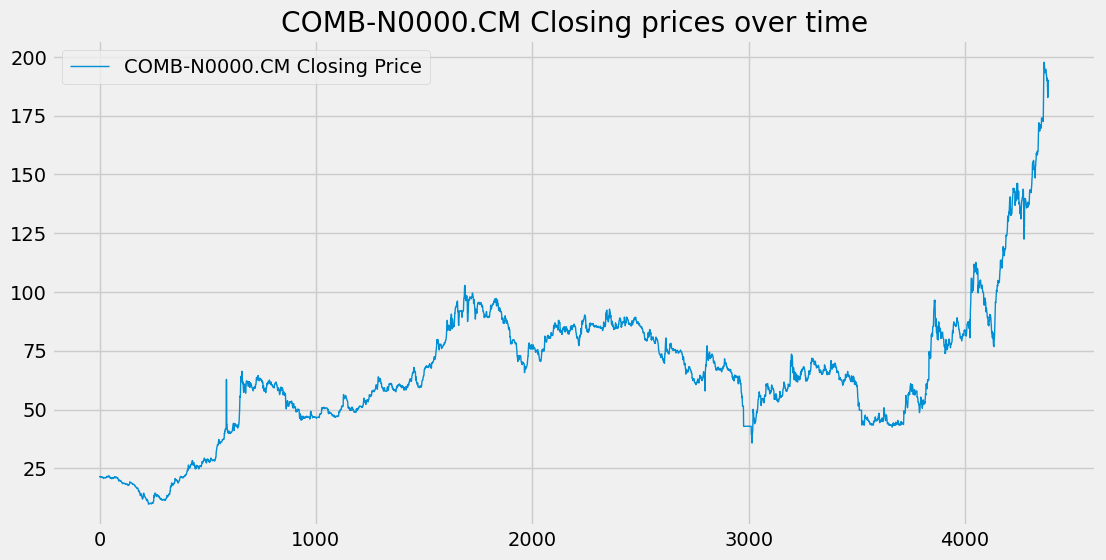

In [50]:
plt.figure(figsize=(12, 6))
plt.plot(df['Close'], label=f'{stock} Closing Price', linewidth=1)
plt.title(f'{stock} Closing prices over time')
plt.legend()
plt.show()


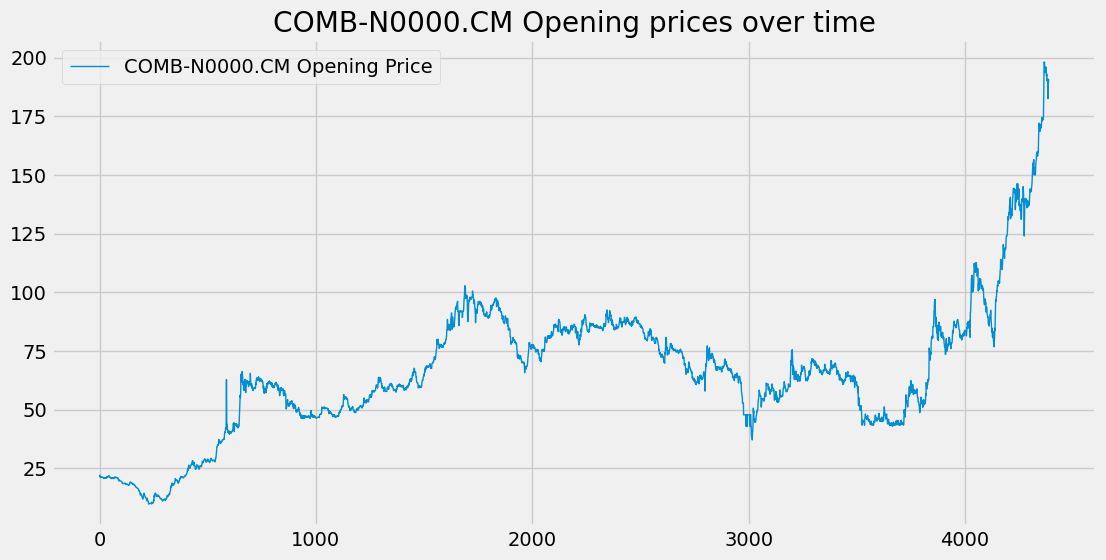

In [51]:
plt.figure(figsize=(12,  6))
plt.plot(df['Open'], label=f'{stock} Opening Price', linewidth=1)
plt.title(f'{stock} Opening prices over time')
plt.legend()
plt.show()


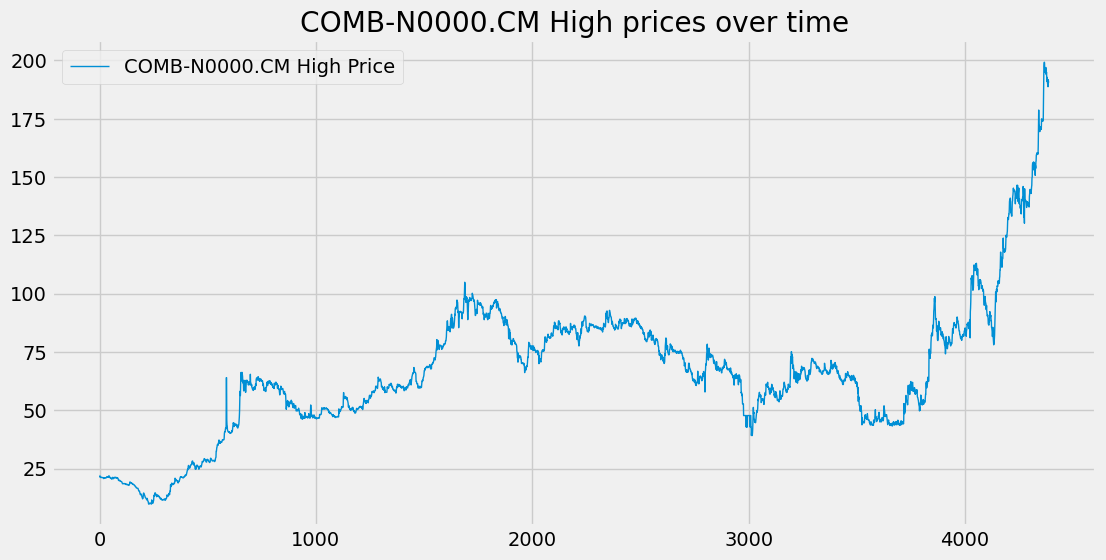

In [52]:
plt.figure(figsize=(12, 6))
plt.plot(df['High'], label=f'{stock} High Price', linewidth=1)
plt.title(f'{stock} High prices over time')
plt.legend()
plt.show()

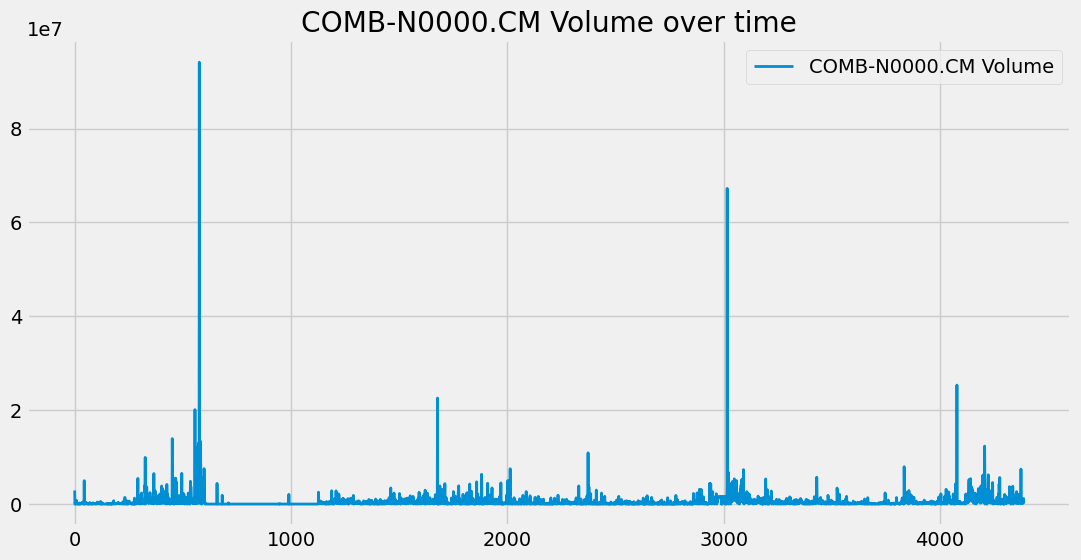

In [53]:
plt.figure(figsize=(12, 6))
plt.plot(df['Volume'], label=f'{stock} Volume', linewidth=2)
plt.title(f'{stock} Volume over time')
plt.legend()
plt.show()


In [54]:
# Moving average

temp_data = [10, 20, 30, 40, 50, 60, 70, 80, 90]
print(sum(temp_data[2:7])/5)

50.0


In [55]:
import pandas as pd
df1 = pd.DataFrame(temp_data)

df1.rolling(5).mean()


,0
0,NaN
1,NaN
2,NaN
3,NaN
4,30.0
5,40.0
6,50.0
7,60.0
8,70.0


In [56]:
ma100 = df.Close.rolling(100).mean()
ma100

Ticker,COMB-N0000.CM
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
4383,162.6975
4384,163.1975
4385,163.7400
4386,164.2750


In [57]:
ma200  = df.Close.rolling(200).mean()


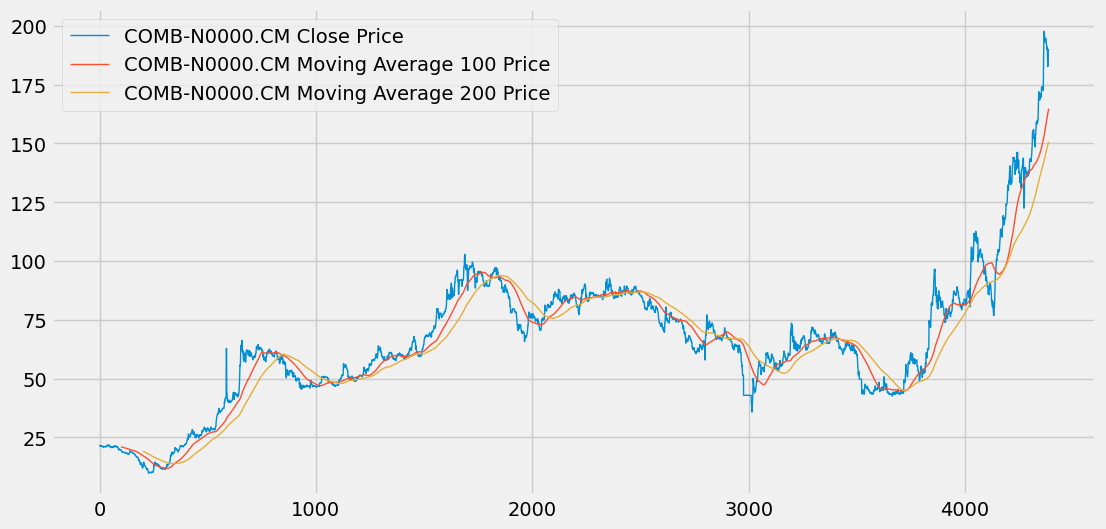

In [58]:
plt.figure(figsize=(12, 6))
plt.plot(df.Close, label=f'{stock} Close Price', linewidth=1)
plt.plot(ma100, label=f'{stock} Moving Average 100 Price', linewidth=1)
plt.plot(ma200, label=f'{stock} Moving Average 200 Price', linewidth=1)
plt.legend()
plt.show()



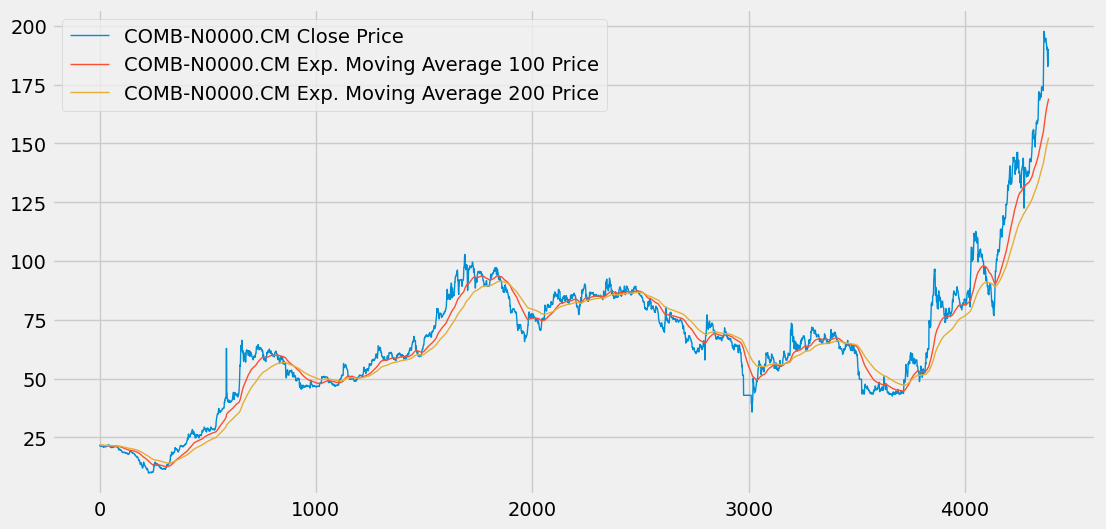

In [59]:
ema100 = df.Close.ewm(span=100, adjust=False).mean()
ema200 = df.Close.ewm(span=200, adjust=False).mean()

plt.figure(figsize=(12, 6))
plt.plot(df.Close, label=f'{stock} Close Price', linewidth=1)
plt.plot(ema100, label=f'{stock} Exp. Moving Average 100 Price', linewidth=1)
plt.plot(ema200, label=f'{stock} Exp. Moving Average 200 Price', linewidth=1)
plt.legend()
plt.show()

In [60]:
# Splitting into trainign and test data
data_train = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_test = pd.DataFrame(df['Close'][int(len(df)*0.70): int(len(df))])

data_train.shape, data_test.shape

((3071, 1), (1317, 1))

In [61]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))

data_train_array = scaler.fit_transform(data_train)

X_train = []
y_train = []

for i in range(100, data_train_array.shape[0]):
    X_train.append(data_train_array[i-100:i])
    y_train.append(data_train_array[i, 0])

X_train, y_train = np.array(X_train), np.array(y_train)


In [62]:
# Building modle

from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

model = Sequential()

model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(60, activation='relu', return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(80, activation='relu', return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units=120, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1))


model.summary()


c:\Users\LENOVO\Desktop\FINAL PROJECTS\StockPricePrediction\.venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                   │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ (None, 100, 60)        │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_6 (LSTM)                   │ (None, 100, 80)        │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 100, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_7 (LSTM)                   │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

In [63]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=50)


Epoch 1/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 37s 185ms/step - loss: 0.0465
Epoch 2/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 17s 178ms/step - loss: 0.0114
Epoch 3/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 17s 178ms/step - loss: 0.0101
Epoch 4/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 17s 179ms/step - loss: 0.0082
Epoch 5/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 17s 178ms/step - loss: 0.0081
Epoch 6/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 18s 189ms/step - loss: 0.0073
Epoch 7/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 20s 212ms/step - loss: 0.0070
Epoch 8/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 21s 221ms/step - loss: 0.0068
Epoch 9/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 20s 211ms/step - loss: 0.0057
Epoch 10/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 20s 202ms/step - loss: 0.0058
Epoch 11/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 17s 181ms/step - loss: 0.0056
Epoch 12/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 19s 201ms/step - loss: 0.0053
Epoch 13/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 18s 199ms/step - loss: 0.0052
Epoch 14/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 23s 229ms/step - loss: 0.0048
Epoch 15/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 25s 

In [66]:
past_100_days = data_train.tail(100)

final_df = pd.concat([past_100_days, data_test], ignore_index=True)


final_df.head()


Ticker,COMB-N0000.CM
0,53.520267
1,51.450817
2,51.450817
3,51.450817
4,51.450817


In [67]:
input_data = scaler.fit_transform(final_df)
X_test = []
y_test = []

for i in range(100, input_data.shape[0]):
    X_test.append(input_data[i-100:i])
    y_test.append(input_data[i, 0])

X_test, y_test = np.array(X_test), np.array(y_test)


In [68]:
y_predict = model.predict(X_test)


42/42 ━━━━━━━━━━━━━━━━━━━━ 6s 109ms/step


In [69]:
scaler.scale_[0]

np.float64(0.006172898230161431)

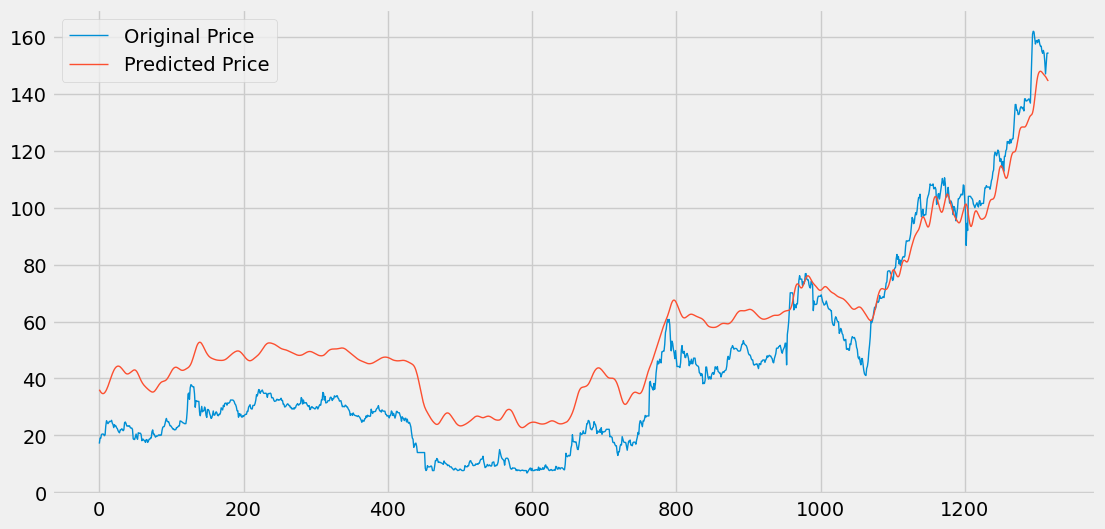

In [70]:
scaler_factor = 1/scaler.scale_[0]
y_predict = y_predict * scaler_factor
y_test = y_test * scaler_factor

plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Original Price', linewidth=1)
plt.plot(y_predict, label='Predicted Price', linewidth=1)
plt.legend()
plt.show()



In [71]:
model.save('stock_model.h5')